In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

# from tensorflow.compat.v1.keras.backend import get_session
# tensorflow.compat.v1.disable_v2_behavior()
# import shap

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from sklearn import preprocessing

import tensorflow as tf

import numpy as np
import os
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt
import mpld3
mpld3.enable_notebook()
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Only using years 2010, 2011, 2012, 2013, and 2014 because of the auroral boundary database used only has those dates

In [2]:
file_load_df_cumulative = '../ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv'
DMSP_DATA_DIR=''
df_cumulative = pd.read_csv(os.path.join(DMSP_DATA_DIR,file_load_df_cumulative))
df_cumulative = df_cumulative.sort_values(by=['ID_SC', 'Datetimes'])
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)

cols_to_drop_validation = [c for c in df_cumulative.columns if ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]
# cols_to_drop_validation = [c for c in df.columns if ('1min' in c) | ('3min' in c) | ('4min' in c) | ('5min' in c) | ('15min' in c) | ('newell' in c) | ('STD' in c) | ('AVG' in c) | ('SC_AACGM_LTIME'==c)]

df_cumulative = df_cumulative.drop(columns=cols_to_drop_validation)

# Separate training and testing data
mask_val = [(df_cumulative.index.year == 2010) & (df_cumulative['ID_SC'].values==16)]
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])

mask_for_2010_to_2014 = [(df_train.index.year == 2010) | (df_train.index.year == 2011)
                         | (df_train.index.year == 2012) |(df_train.index.year == 2013)
                         | (df_train.index.year == 2014)]
df_train = df_train[mask_for_2010_to_2014[0]]
df_train = df_train.sort_values(by=['ID_SC', 'Datetimes'])
df_val = df_val.sort_values(by=['ID_SC', 'Datetimes'])

In [3]:
# Construct X and y
feature_cols = [c for c in df_train.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
from sklearn import preprocessing
X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

%matplotlib inline  
import matplotlib.pyplot as plt
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

# First train without considering the auroral regions at all to get a baseline MSE accuracy

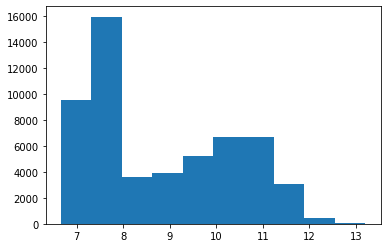

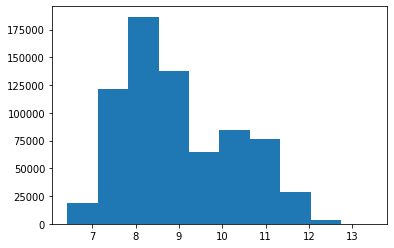

In [4]:
plt.figure()
# summarize history for loss
plt.hist(y_val_log.values)
plt.show()

plt.figure()
# summarize history for loss
plt.hist(y_train_log.values)
plt.show()

Epoch 1/1000
705/705 [==============================] - 1s 2ms/step - loss: 9.2241 - mse: 9.2241 - val_loss: 2.0128 - val_mse: 2.0128
Epoch 2/1000
705/705 [==============================] - 1s 2ms/step - loss: 2.3760 - mse: 2.3760 - val_loss: 1.6971 - val_mse: 1.6971
Epoch 3/1000
705/705 [==============================] - 1s 2ms/step - loss: 1.4889 - mse: 1.4889 - val_loss: 1.3960 - val_mse: 1.3960
Epoch 4/1000
705/705 [==============================] - 1s 2ms/step - loss: 1.0929 - mse: 1.0929 - val_loss: 1.1687 - val_mse: 1.1687
Epoch 5/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.9329 - mse: 0.9329 - val_loss: 1.0049 - val_mse: 1.0049
Epoch 6/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.8608 - mse: 0.8608 - val_loss: 0.9241 - val_mse: 0.9241
Epoch 7/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.7681 - mse: 0.7681 - val_loss: 0.7715 - val_mse: 0.7715
Epoch 8/1000
705/705 [==============================] - 1s 2ms

Epoch 62/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4849 - mse: 0.4849 - val_loss: 0.5949 - val_mse: 0.5949
Epoch 63/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4836 - mse: 0.4836 - val_loss: 0.5962 - val_mse: 0.5962
Epoch 64/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4838 - mse: 0.4838 - val_loss: 0.5947 - val_mse: 0.5947
Epoch 65/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4827 - mse: 0.4827 - val_loss: 0.6003 - val_mse: 0.6003
Epoch 66/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4811 - mse: 0.4811 - val_loss: 0.5939 - val_mse: 0.5939
Epoch 67/1000
705/705 [==============================] - 2s 2ms/step - loss: 0.4846 - mse: 0.4846 - val_loss: 0.5967 - val_mse: 0.5967
Epoch 68/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4825 - mse: 0.4825 - val_loss: 0.5914 - val_mse: 0.5914
Epoch 69/1000
705/705 [==============================] 

705/705 [==============================] - 1s 2ms/step - loss: 0.4545 - mse: 0.4545 - val_loss: 0.5888 - val_mse: 0.5888
Epoch 183/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4543 - mse: 0.4543 - val_loss: 0.5931 - val_mse: 0.5931
Epoch 184/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4541 - mse: 0.4541 - val_loss: 0.5924 - val_mse: 0.5924
Epoch 185/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4542 - mse: 0.4542 - val_loss: 0.5895 - val_mse: 0.5895
Epoch 186/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4539 - mse: 0.4539 - val_loss: 0.6009 - val_mse: 0.6009
Epoch 187/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4550 - mse: 0.4550 - val_loss: 0.5912 - val_mse: 0.5912
Epoch 188/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4546 - mse: 0.4546 - val_loss: 0.5868 - val_mse: 0.5868
Epoch 189/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.4443 - mse: 0.4443 - val_loss: 0.5891 - val_mse: 0.5891
Epoch 303/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4450 - mse: 0.4450 - val_loss: 0.5929 - val_mse: 0.5929
Epoch 304/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4441 - mse: 0.4441 - val_loss: 0.5941 - val_mse: 0.5941
Epoch 305/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4446 - mse: 0.4446 - val_loss: 0.6032 - val_mse: 0.6032
Epoch 306/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4446 - mse: 0.4446 - val_loss: 0.6036 - val_mse: 0.6036
Epoch 307/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4440 - mse: 0.4440 - val_loss: 0.6086 - val_mse: 0.6086
Epoch 308/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4438 - mse: 0.4438 - val_loss: 0.5983 - val_mse: 0.5983
Epoch 309/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.4380 - mse: 0.4380 - val_loss: 0.5926 - val_mse: 0.5926
Epoch 423/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4394 - mse: 0.4394 - val_loss: 0.5899 - val_mse: 0.5899
Epoch 424/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4394 - mse: 0.4394 - val_loss: 0.5931 - val_mse: 0.5931
Epoch 425/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4383 - mse: 0.4383 - val_loss: 0.5933 - val_mse: 0.5933
Epoch 426/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4384 - mse: 0.4384 - val_loss: 0.5946 - val_mse: 0.5946
Epoch 427/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4374 - mse: 0.4374 - val_loss: 0.5885 - val_mse: 0.5885
Epoch 428/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4388 - mse: 0.4388 - val_loss: 0.6051 - val_mse: 0.6051
Epoch 429/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.4339 - mse: 0.4339 - val_loss: 0.5973 - val_mse: 0.5973
Epoch 543/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4344 - mse: 0.4344 - val_loss: 0.6014 - val_mse: 0.6014
Epoch 544/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4354 - mse: 0.4354 - val_loss: 0.5949 - val_mse: 0.5949
Epoch 545/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4352 - mse: 0.4352 - val_loss: 0.5940 - val_mse: 0.5940
Epoch 546/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4341 - mse: 0.4341 - val_loss: 0.5917 - val_mse: 0.5917
Epoch 547/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4341 - mse: 0.4341 - val_loss: 0.6023 - val_mse: 0.6023
Epoch 548/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4348 - mse: 0.4348 - val_loss: 0.5883 - val_mse: 0.5883
Epoch 549/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.4320 - mse: 0.4320 - val_loss: 0.5948 - val_mse: 0.5948
Epoch 663/1000
705/705 [==============================] - ETA: 0s - loss: 0.4317 - mse: 0.431 - 1s 2ms/step - loss: 0.4317 - mse: 0.4317 - val_loss: 0.6010 - val_mse: 0.6010
Epoch 664/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4316 - mse: 0.4316 - val_loss: 0.5958 - val_mse: 0.5958
Epoch 665/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4316 - mse: 0.4316 - val_loss: 0.6100 - val_mse: 0.6100
Epoch 666/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4324 - mse: 0.4324 - val_loss: 0.6076 - val_mse: 0.6076
Epoch 667/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4316 - mse: 0.4316 - val_loss: 0.6029 - val_mse: 0.6029
Epoch 668/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4331 - mse: 0.4331 - val_loss: 0.6083 - val_mse: 0.6083
Epoch 669/1000
705/705 [=

705/705 [==============================] - 1s 2ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.5998 - val_mse: 0.5998
Epoch 723/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4310 - mse: 0.4310 - val_loss: 0.5982 - val_mse: 0.5982
Epoch 724/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4304 - mse: 0.4304 - val_loss: 0.6082 - val_mse: 0.6082
Epoch 725/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.5965 - val_mse: 0.5965
Epoch 726/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4300 - mse: 0.4300 - val_loss: 0.6154 - val_mse: 0.6154
Epoch 727/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4306 - mse: 0.4306 - val_loss: 0.6001 - val_mse: 0.6001
Epoch 728/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4301 - mse: 0.4301 - val_loss: 0.5914 - val_mse: 0.5914
Epoch 729/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 1ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.6046 - val_mse: 0.6046
Epoch 843/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4281 - mse: 0.4281 - val_loss: 0.5983 - val_mse: 0.5983
Epoch 844/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4283 - mse: 0.4283 - val_loss: 0.6008 - val_mse: 0.6008
Epoch 845/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4279 - mse: 0.4279 - val_loss: 0.6028 - val_mse: 0.6028
Epoch 846/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4284 - mse: 0.4284 - val_loss: 0.5979 - val_mse: 0.5979
Epoch 847/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4287 - mse: 0.4287 - val_loss: 0.6093 - val_mse: 0.6093
Epoch 848/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4287 - mse: 0.4287 - val_loss: 0.5947 - val_mse: 0.5947
Epoch 849/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 0.4263 - mse: 0.4263 - val_loss: 0.5938 - val_mse: 0.5938
Epoch 963/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4260 - mse: 0.4260 - val_loss: 0.5954 - val_mse: 0.5954
Epoch 964/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4264 - mse: 0.4264 - val_loss: 0.6043 - val_mse: 0.6043
Epoch 965/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4264 - mse: 0.4264 - val_loss: 0.5959 - val_mse: 0.5959
Epoch 966/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4259 - mse: 0.4259 - val_loss: 0.6039 - val_mse: 0.6039
Epoch 967/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4273 - mse: 0.4273 - val_loss: 0.5964 - val_mse: 0.5964
Epoch 968/1000
705/705 [==============================] - 1s 2ms/step - loss: 0.4250 - mse: 0.4250 - val_loss: 0.5996 - val_mse: 0.5996
Epoch 969/1000
705/705 [==============================] - 1s 2m

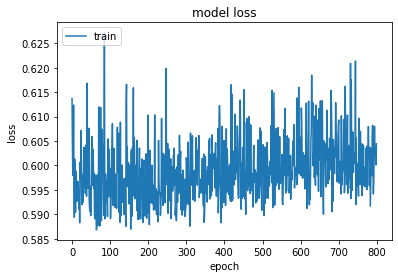

In [5]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1))


# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

# history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)),
#                     batch_size=1024,epochs=1000)

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][200:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

W0716 11:22:41.609100 140284021475136 deprecation.py:506] From /home/jackalak/.local/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


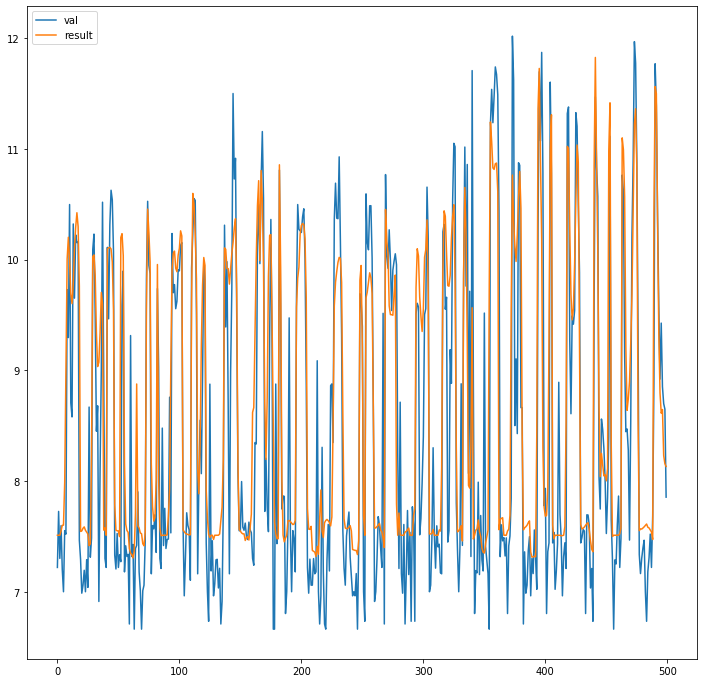

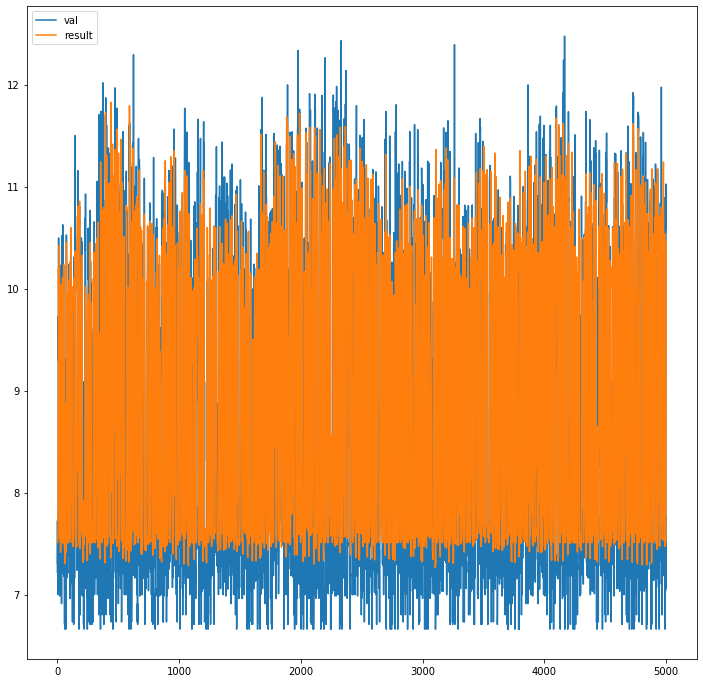

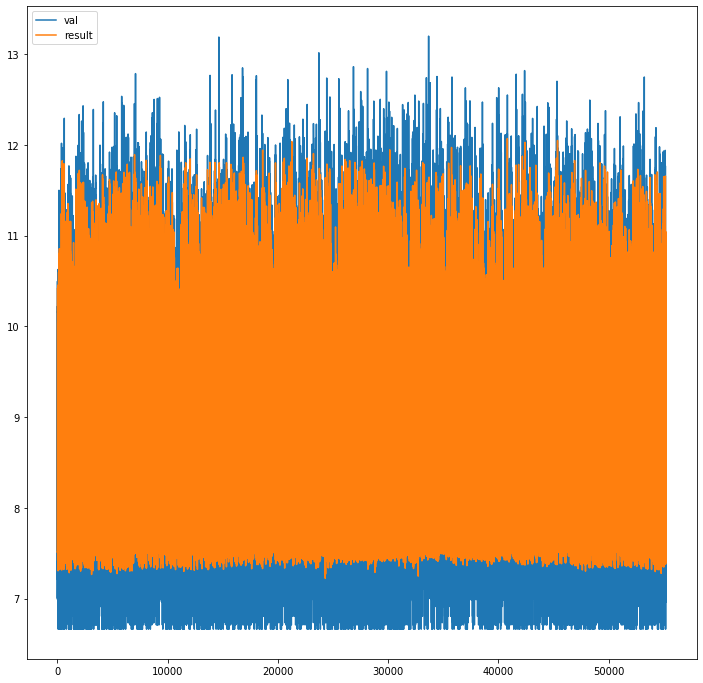

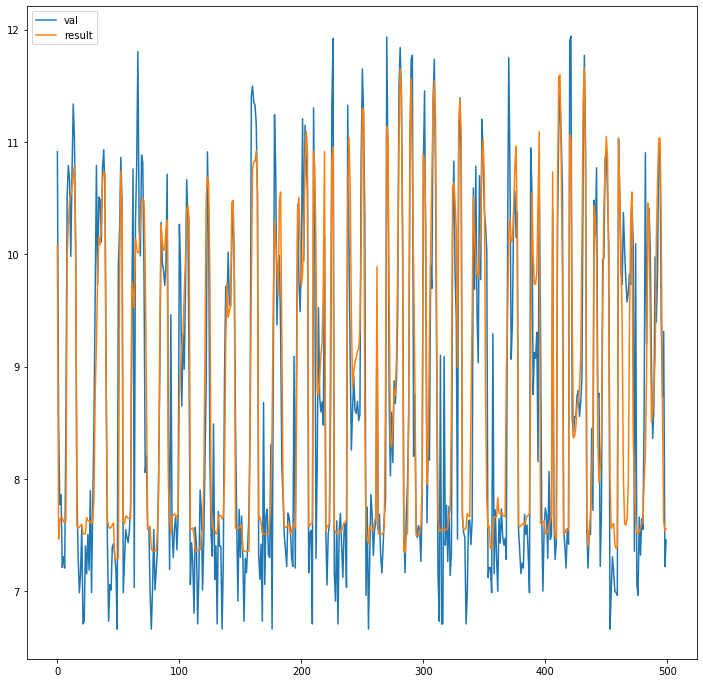

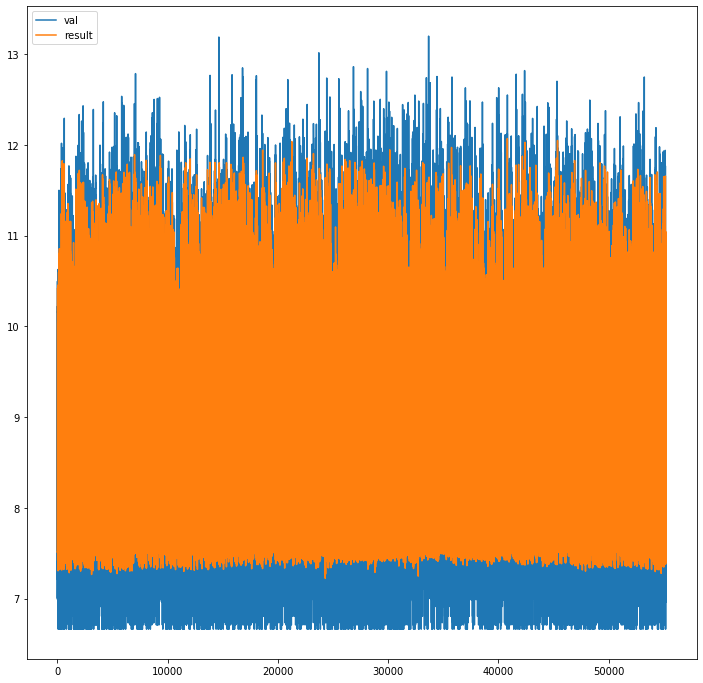

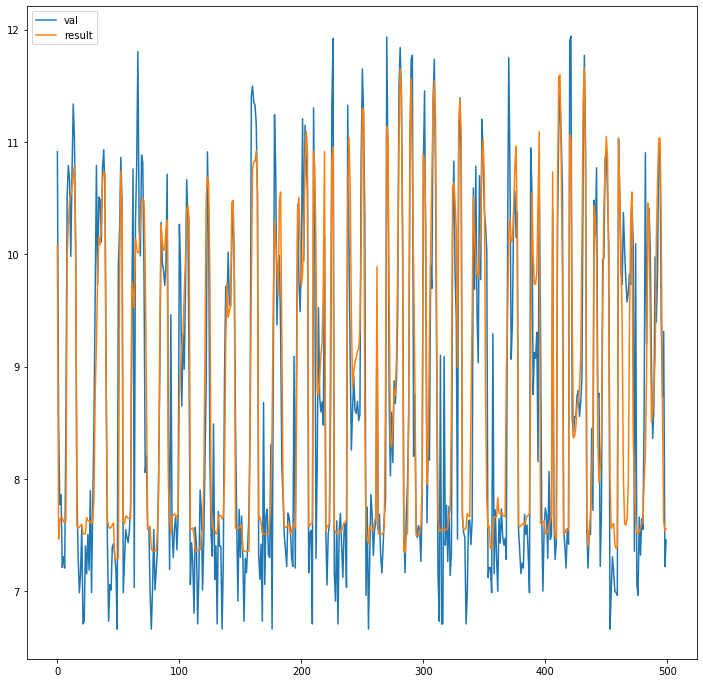

In [6]:

filename = 'best_base_line'

model.save(filename)
model = tensorflow.keras.models.load_model(filename)

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)


plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

# Read in the the auroral regions from a pickle file (constructed from auroral boundary transition points) 

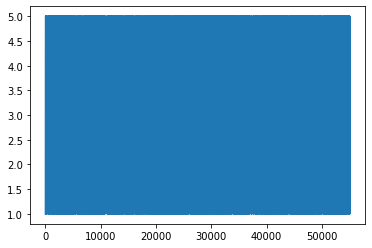

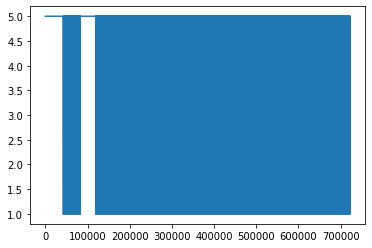

In [4]:
# df_val.to_pickle('with_aurora_type_val.pkl')
# df_train.to_pickle('with_aurora_type_train.pkl')
df_val = pd.read_pickle("./with_aurora_type_val.pkl")
df_train = pd.read_pickle("./with_aurora_type_train.pkl")


plt.figure()
plt.plot(df_val['aurora_type'].values[:])
plt.show()

plt.figure()
plt.plot(df_train['aurora_type'].values[:])
plt.show()

In [5]:
sum(df_val['aurora_type']==5)/df_val['aurora_type'].shape[0]

0.564933888788263

In [6]:
sum(df_train['aurora_type']==5)/df_train['aurora_type'].shape[0]

0.5490338676186004

# The boundary transition type regions can be reduced to 3 instead of 4 regions (plus unknown region 5), because going into the auroal region from the equatorial region or the polar region is the same for our intention of labeling just equatorial region, auroral, region, or polar region. 

# therefore type 4 is the same as type 1

In [7]:
df_val['aurora_type'][ df_val['aurora_type']==4 ]= 1
df_train['aurora_type'][ df_train['aurora_type']==4 ]= 1


False
False
False


(array([ 7048.,     0., 10174.,     0.,     0.,  6626.,     0.,     0.,
            0., 31190.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

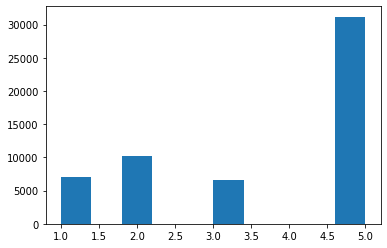

In [8]:

mask = ( np.isnan(df_train['aurora_type'])==False )
df_train_clean = df_train[mask].copy(deep=True)
print((mask.any())==False)
mask = ( np.isnan(df_val['aurora_type'])==False)
df_val_clean = df_val[mask].copy(deep=True)

print(np.isnan(df_val_clean).any().any())
print(np.isnan(df_train_clean).any().any())



plt.hist(df_val_clean['aurora_type'])

In [9]:

# Construct X and y
feature_cols = [c for c in df_train_clean.columns if not 'ELE' in c]
#print( (feature_cols))
#print(df_cumulative.columns)
from sklearn import preprocessing
X_val = df_val_clean[feature_cols].copy(deep=True)
y_val = df_val_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_clean[feature_cols].copy(deep=True)
y_train = df_train_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

%matplotlib inline  
import matplotlib.pyplot as plt
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

Y = np.array(y_train_log, dtype=np.float32)


In [10]:
X_train_no_aurora_type = X_train.drop(columns='aurora_type')
X_val_no_aurora_type = X_val.drop(columns='aurora_type')
scaler_X = scaler_X.fit(X_train_no_aurora_type.values)
X_val_no_aurora_type_scaled = scaler_X.transform(X_val_no_aurora_type.values)
X_train_no_aurora_type_scaled = scaler_X.transform(X_train_no_aurora_type.values)

y_train_aurora_type = X_train['aurora_type']
y_val_aurora_type = X_val['aurora_type']

In [11]:

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(y_train_aurora_type)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded = label_encoder.fit_transform(y_val_aurora_type)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)

print(X_train_no_aurora_type_scaled.shape)

print(y_train_aurora_type.shape)
print(y_train_aurora_type_encoded.shape)

(720998,)
(720998,)
(720998, 148)
(720998,)
(720998, 4)


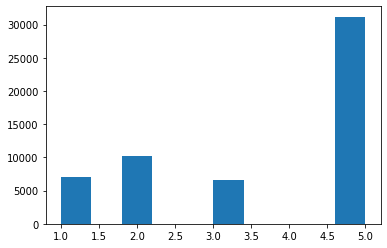

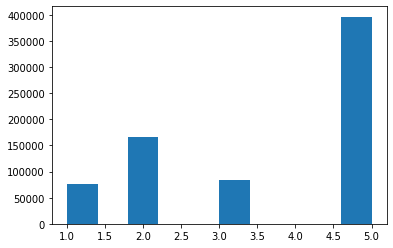

In [12]:
plt.hist(y_val_aurora_type)
plt.show()
plt.hist(y_train_aurora_type)
plt.show()

False
(324651,)
(324651,)
(324651, 148)
(324651,)
(324651, 3)


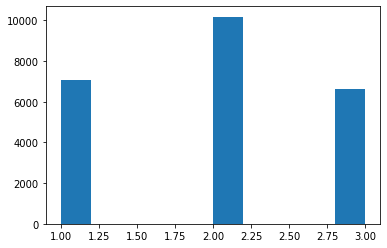

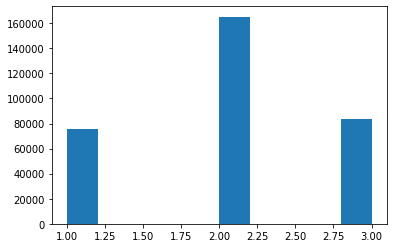

In [13]:

mask = [ (np.isnan(df_train['aurora_type'])==False) & (df_train['aurora_type'] != 5 ) ]
df_train_clean = df_train[mask[0]].copy(deep=True)
print((mask[0].any())==False)
mask = [ (np.isnan(df_val['aurora_type'])==False) & (df_val['aurora_type'] != 5 ) ]
df_val_clean = df_val[mask[0]].copy(deep=True)



# Construct X and y
feature_cols = [c for c in df_train_clean.columns if not 'ELE' in c]
from sklearn import preprocessing
X_val = df_val_clean[feature_cols].copy(deep=True)
y_val = df_val_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_clean[feature_cols].copy(deep=True)
y_train = df_train_clean['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))


X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

Y = np.array(y_train_log, dtype=np.float32)

X_train_no_aurora_type = X_train.drop(columns='aurora_type')
X_val_no_aurora_type = X_val.drop(columns='aurora_type')
scaler_X = scaler_X.fit(X_train_no_aurora_type.values)
X_val_no_aurora_type_scaled = scaler_X.transform(X_val_no_aurora_type.values)
X_train_no_aurora_type_scaled = scaler_X.transform(X_train_no_aurora_type.values)

y_train_aurora_type = X_train['aurora_type']
y_val_aurora_type = X_val['aurora_type']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = label_encoder.fit_transform(y_train_aurora_type)
print(integer_encoded.shape)

integer_encoded_train = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded.shape)

y_train_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_train)
integer_encoded = label_encoder.fit_transform(y_val_aurora_type)
integer_encoded_val = integer_encoded.reshape(len(integer_encoded), 1)
y_val_aurora_type_encoded = onehot_encoder.fit_transform(integer_encoded_val)

print(X_train_no_aurora_type_scaled.shape)

print(y_train_aurora_type.shape)
print(y_train_aurora_type_encoded.shape)

sum(df_val_clean['aurora_type']==2)/df_val_clean.shape[0]
sum(df_train_clean['aurora_type']==2)/df_train_clean.shape[0]



plt.hist(y_val_aurora_type)
plt.show()
plt.hist(y_train_aurora_type)
plt.show()

In [14]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))

# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3,activation='softmax'))

# #compile model using accuracy to measure model performance
# model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer='adam',  metrics=['accuracy'])

# history = model.fit(X_train_no_aurora_type_scaled, y_train_aurora_type_encoded, validation_data=(X_val_no_aurora_type_scaled, y_val_aurora_type_encoded), batch_size=32,epochs=75)

In [15]:
# filename = 'best_auroral_region_predictor'

# # model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# model.save_weights('best_auroral_region_predictor_weights.h5')

W0717 11:42:18.268851 139635600000832 deprecation.py:323] From <ipython-input-16-42a6adf1b347>:7: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


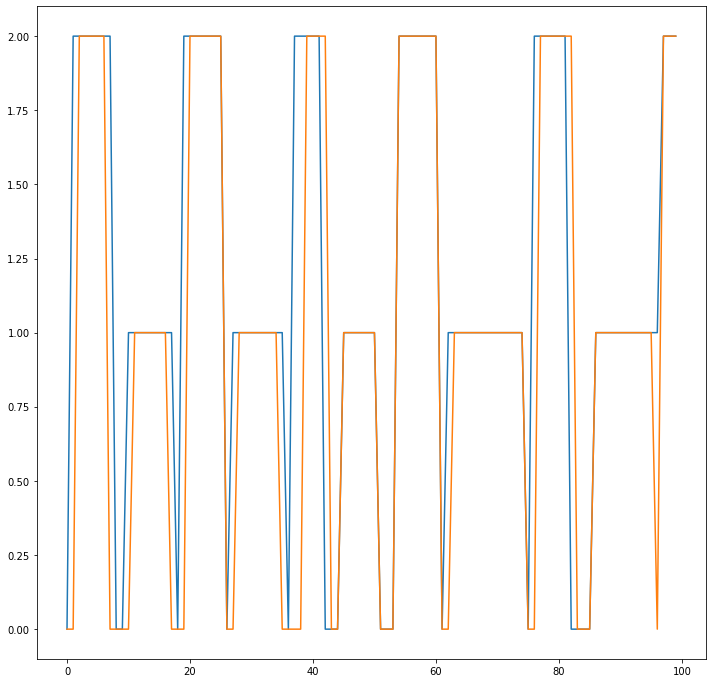

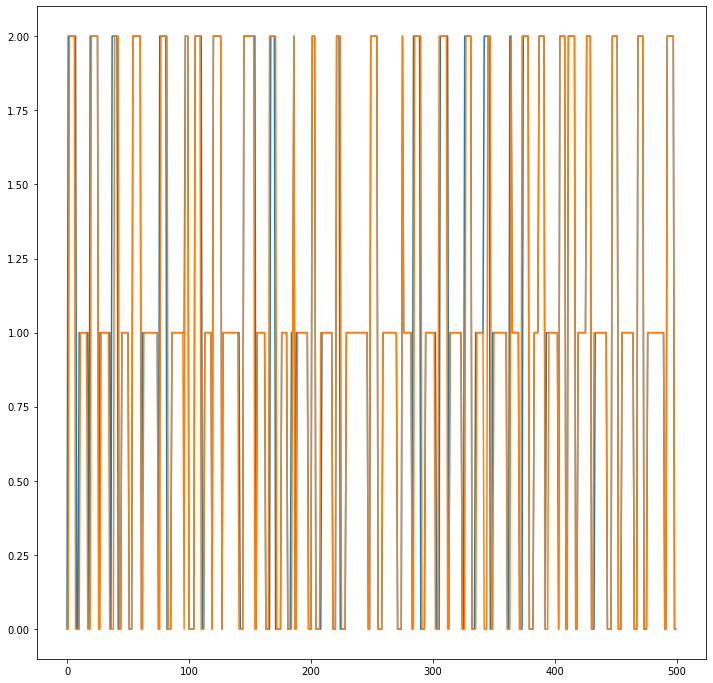

In [16]:
filename = 'best_auroral_region_predictor'

model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# model.save_weights('best_auroral_region_predictor_weights.h5')

results = (model.predict_classes(X_val_no_aurora_type_scaled))#, y_val_log.values)#, batch_size=128)



# plt.figure(figsize=(12,12))

# plt.plot( integer_encoded_val[:3000])
# plt.plot(results[:3000])
# plt.show()
plt.figure(figsize=(12,12))

plt.plot( integer_encoded_val[:100])
plt.plot(results[:100])
plt.show()

plt.figure(figsize=(12,12))

plt.plot( integer_encoded_val[:500])
plt.plot(results[:500])
plt.show()

# Now use this Auroal region predictor model to predict what type the "unknown/unspecified" regions are.  Then combine this predicted data with the known training and test data

In [17]:
 
mask = [ (np.isnan(df_train['aurora_type'])==True) | (df_train['aurora_type'] == 5 ) ]
df_train_pred = df_train[mask[0]].copy(deep=True)
print((mask[0].any())==False)
mask = [ (np.isnan(df_val['aurora_type'])==True) | (df_val['aurora_type'] == 5 ) ]
df_val_pred = df_val[mask[0]].copy(deep=True)
print(df_train_pred.shape)
print(df_val_pred.shape)

False
(397248, 150)
(31362, 150)


In [18]:
print(df_train_pred.columns)

# Construct X and y
feature_cols = [c for c in df_train_pred.columns if (not ( 'ELE' in c) | ('aurora_type' in c))]
X_train = df_train_pred[feature_cols].copy(deep=True)
X_val = df_val_pred[feature_cols].copy(deep=True)
print(X_train.shape)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)
X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)
#scaler_X = scaler_X.fit(X_train_no_aurora_type.values)



Index(['SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut', 'cos_ut',
       'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME',
       'F107',
       ...
       'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'vsw_5min', 'vx_5min',
       'psw_5min', 'borovsky_5min', 'newell_5min', 'aurora_type'],
      dtype='object', length=150)
(397248, 148)


(397248, 148)
(324651,)
(397248, 150)
(397248, 150)
(324651, 150)


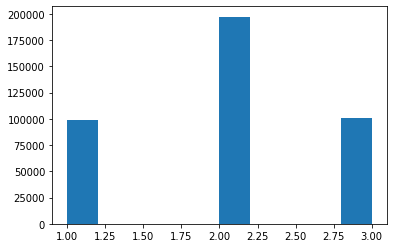

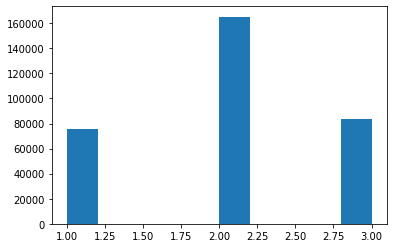

In [19]:

print(X.shape)

print((model.predict_classes(X_train_no_aurora_type_scaled)).shape)
print(df_train_pred.shape)

df_train_pred['aurora_type']= model.predict_classes(X)+1
df_val_pred['aurora_type']= model.predict_classes(X_test)+1

plt.figure()
plt.hist(df_train_pred['aurora_type'])
plt.figure()
plt.hist(df_train_clean['aurora_type'])

print(df_train_pred.shape)
print(df_train_clean.shape)

frames = [df_train_clean, df_train_pred]
df_train_new = pd.concat(frames)
frames = [df_val_clean, df_val_pred]
df_val_new = pd.concat(frames) 

In [54]:

# Construct X and y
feature_cols = [c for c in df_train_new.columns if not 'ELE' in c]

X_val = df_val_new[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_new[feature_cols].copy(deep=True)
y_train = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)


# Now with the supervised auroral type values and the predicted (unsupervised) type values as a new column in the input X, predict the scalar energy flux y

In [21]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1))


# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',  metrics=['mse','mae'])

# history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

In [22]:
# filename = 'best_with_auroral_region2'

# model = tensorflow.keras.models.load_model(filename)
# model.save(filename)
# #model.save_weights('my_model_weights.h5')

In [55]:
filename = 'best_with_auroral_region2'

model = tensorflow.keras.models.load_model(filename)

model.evaluate(X_test,y_val_log)


1726/1726 [==============================] - 1s 818us/step - loss: 0.5741 - mean_squared_error: 0.5741


[0.5740591883659363, 0.5740591883659363]

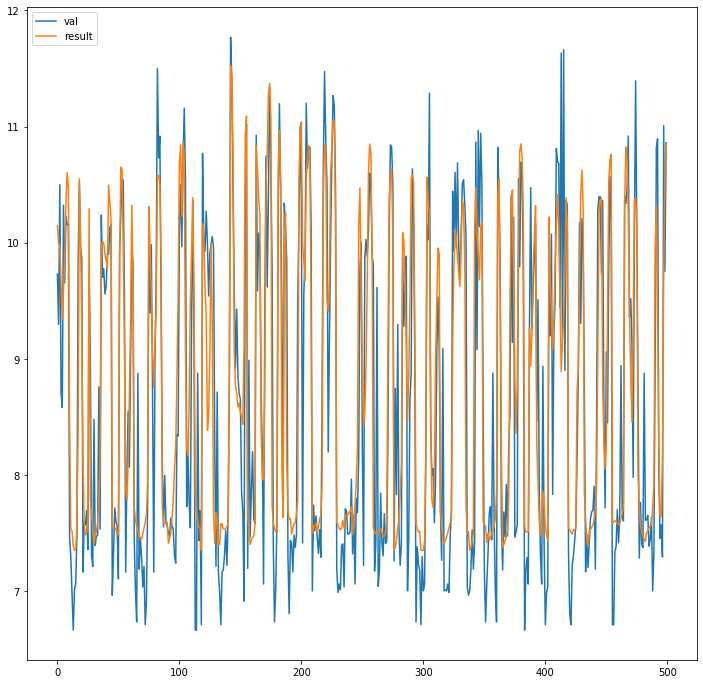

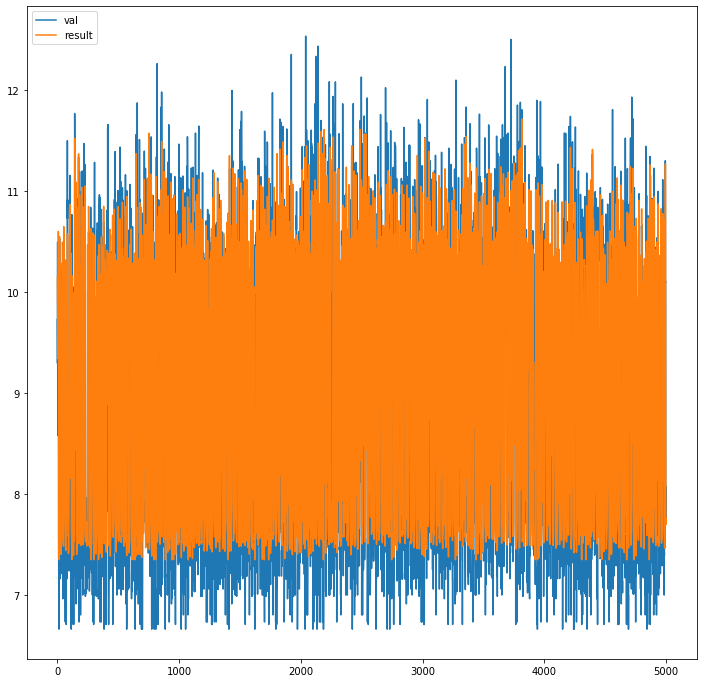

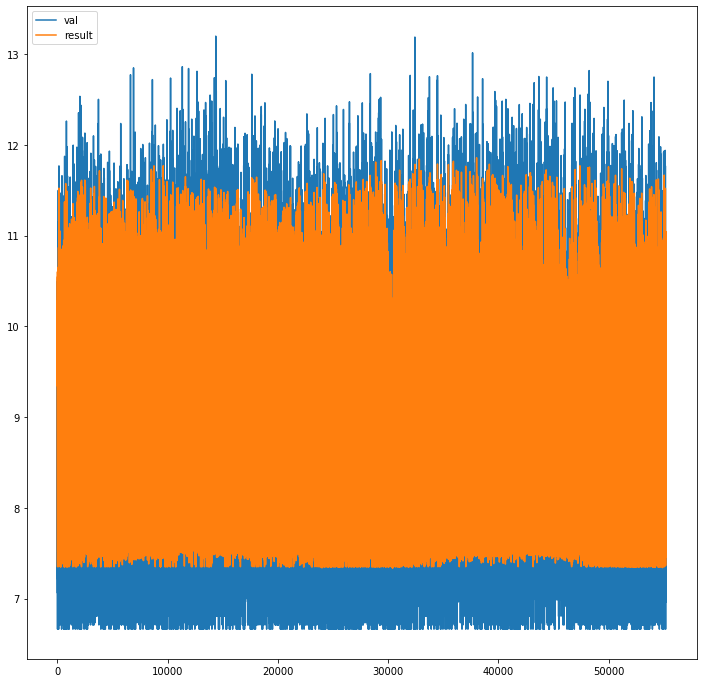

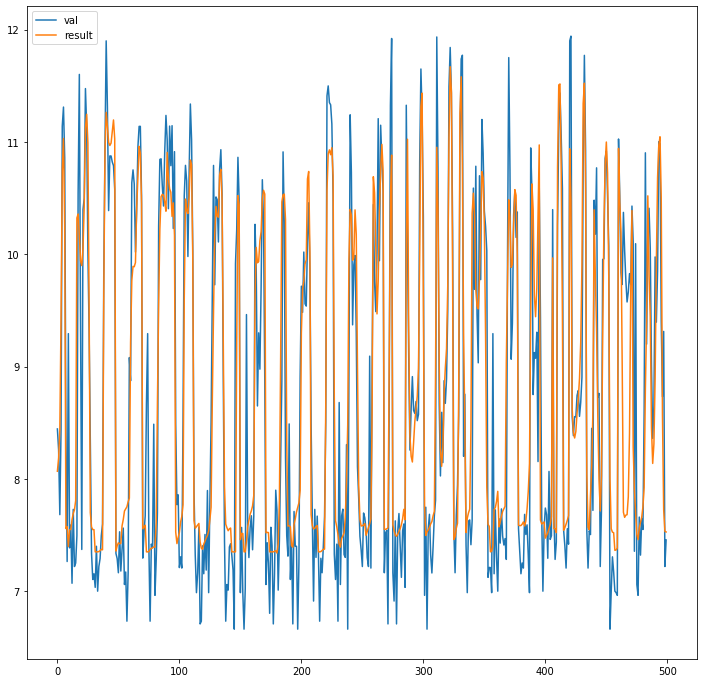

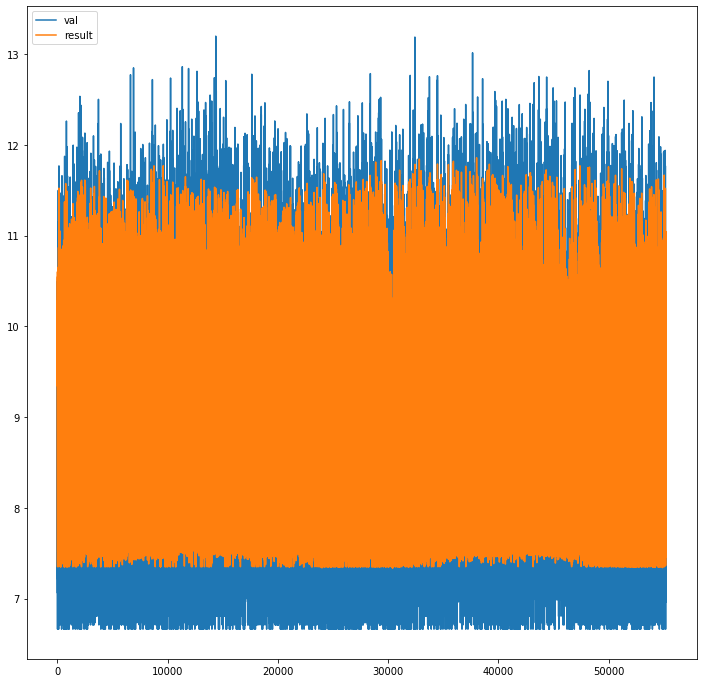

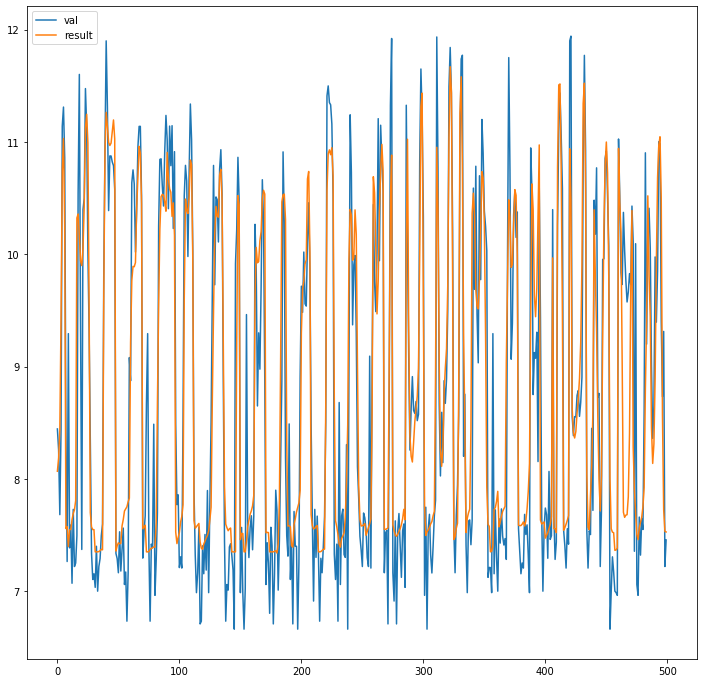

In [24]:

results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)


plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y_val_log.values[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

# Now with the supervised auroral type values and the predicted (unsupervised) type values as a new column in the input X, predict the scalar energy flux y

# The target Y is now a vector result where the true value only has one of the three as non-zero, the correct answer is specified by the auroral region type, equatorial region, in aurora, and the polar region

# The loss is the MSE of all three, to compare this loss to the previous approach that is signal modal, multiply the loss by the number of modes which is three

(array([174354.,      0.,      0.,      0.,      0., 362529.,      0.,
             0.,      0., 185016.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

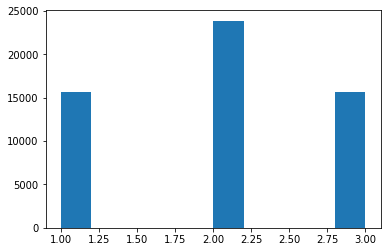

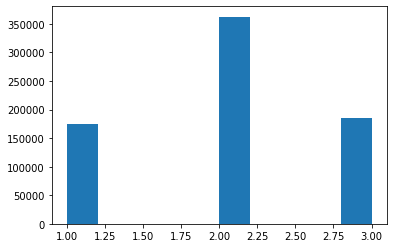

In [58]:

# Construct X and y
feature_cols = [c for c in df_train_new.columns if not 'ELE' in c]
X_val = df_val_new[feature_cols].copy(deep=True)
y_val = df_val_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train_new[feature_cols].copy(deep=True)
y_train_val = df_train_new['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log1 = np.log10(y_train.copy(deep=True))
y_val_log1 = np.log10(y_val.copy(deep=True))

y_train_log = np.zeros((y_train_log1.values.shape[0],3))
y_val_log = np.zeros((y_val_log1.values.shape[0],3))

for i in range(0,X_val.values.shape[0]):
    if X_val['aurora_type'].values[i] == 1:
        y_val_log[i,0]=y_val_log1.values[i]
    if X_val['aurora_type'].values[i] == 2:
        y_val_log[i,1]=y_val_log1.values[i]
    if X_val['aurora_type'].values[i] == 3:
        y_val_log[i,2]=y_val_log1.values[i]
for i in range(0,X_train.values.shape[0]):
    if X_train['aurora_type'].values[i] == 1:
        y_train_log[i,0]=y_train_log1.values[i]
    if X_train['aurora_type'].values[i] == 2:
        y_train_log[i,1]=y_train_log1.values[i]
    if X_train['aurora_type'].values[i] == 3:
        y_train_log[i,2]=y_train_log1.values[i]



scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)

plt.figure()
plt.hist(X_val['aurora_type'].values)
plt.figure()
plt.hist(X_train['aurora_type'].values)

In [59]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3))


# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

# history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

In [60]:
# filename = 'best_with_auroral_region4'

# model.save(filename)
# model.save_weights('my_model_weights2.h5')

In [62]:
filename = 'best_with_auroral_region4'

model = tensorflow.keras.models.load_model(filename)


model.evaluate(X_test,y_val_log)

1726/1726 [==============================] - 2s 1ms/step - loss: 0.1915 - mean_squared_error: 0.1915


[0.19145530462265015, 0.19145530462265015]

In [ ]:
# print(history.history.keys())
# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][20:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.figure()
# # summarize history for loss
# plt.plot(history.history['val_loss'][200:])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

55210
(55210,)


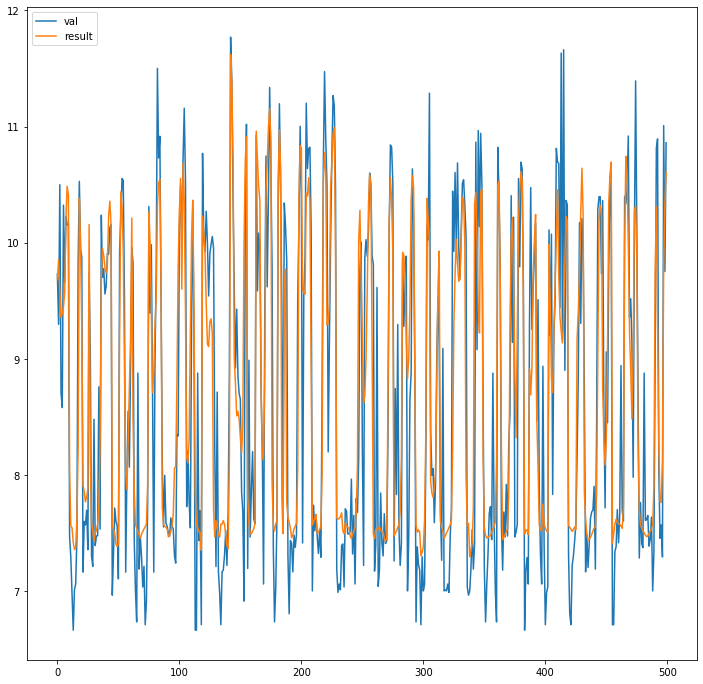

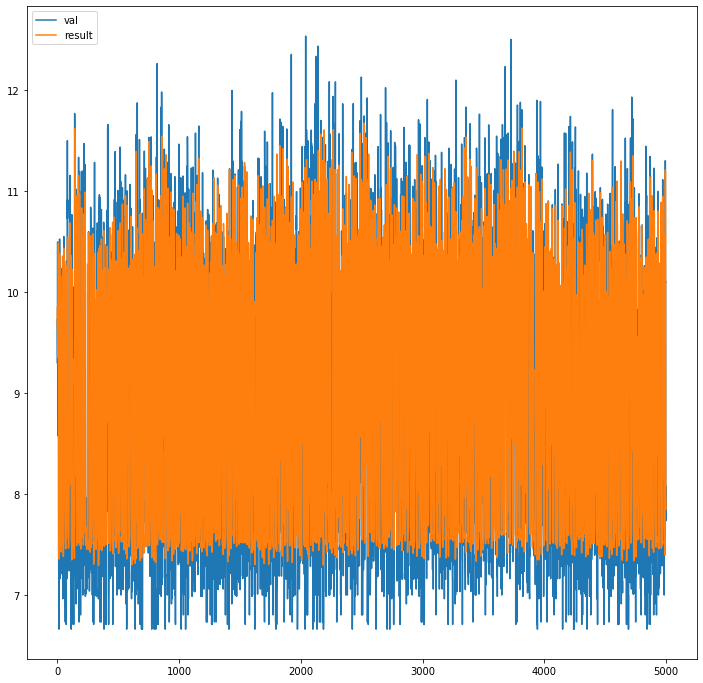

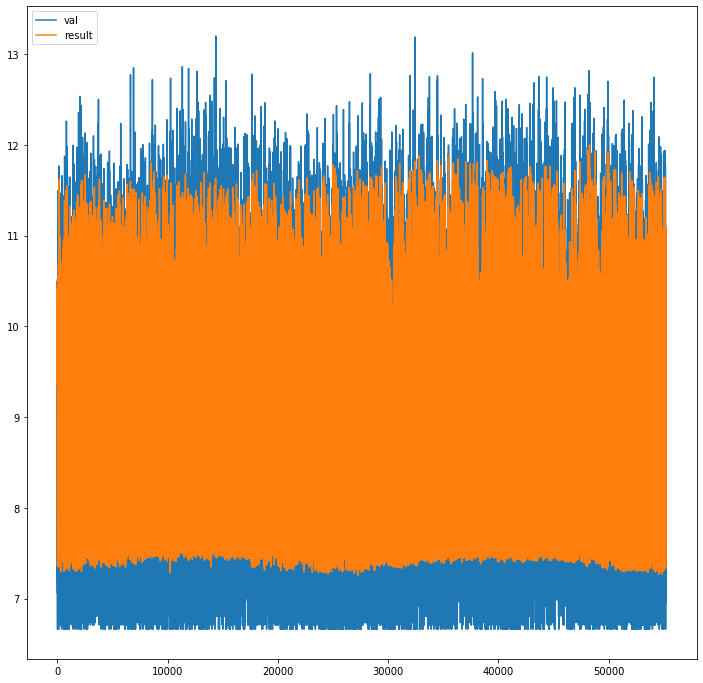

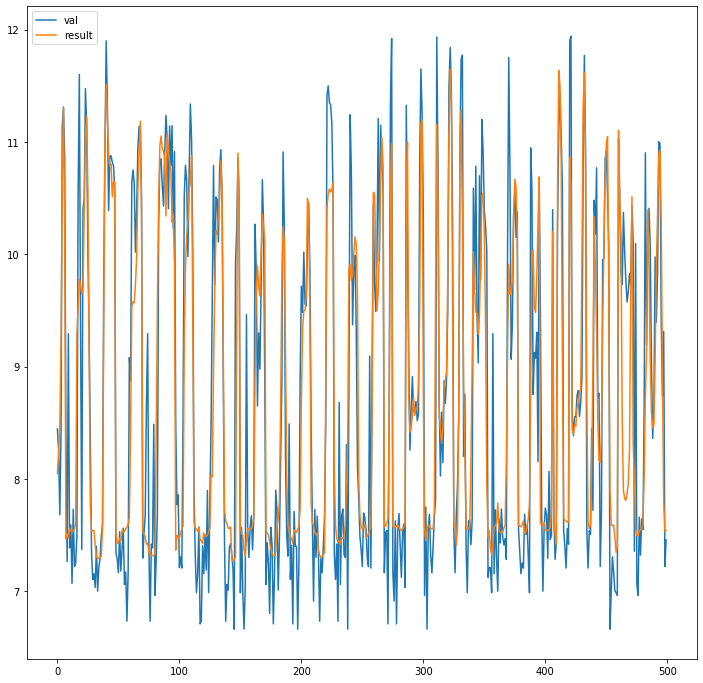

In [33]:
results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.max(results1[i,:])
    y[i] = np.max(y_val_log[i,:])
    
plt.figure(figsize=(12,12))
plt.plot(y[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

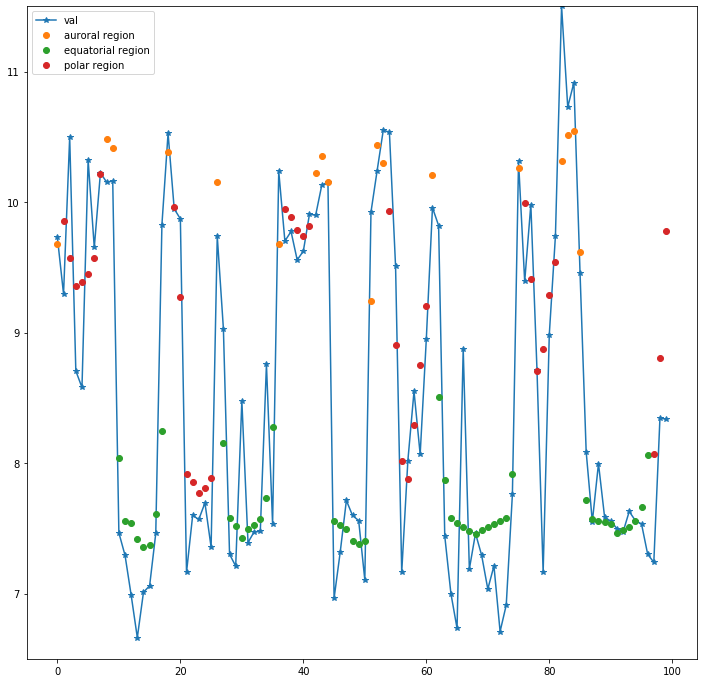

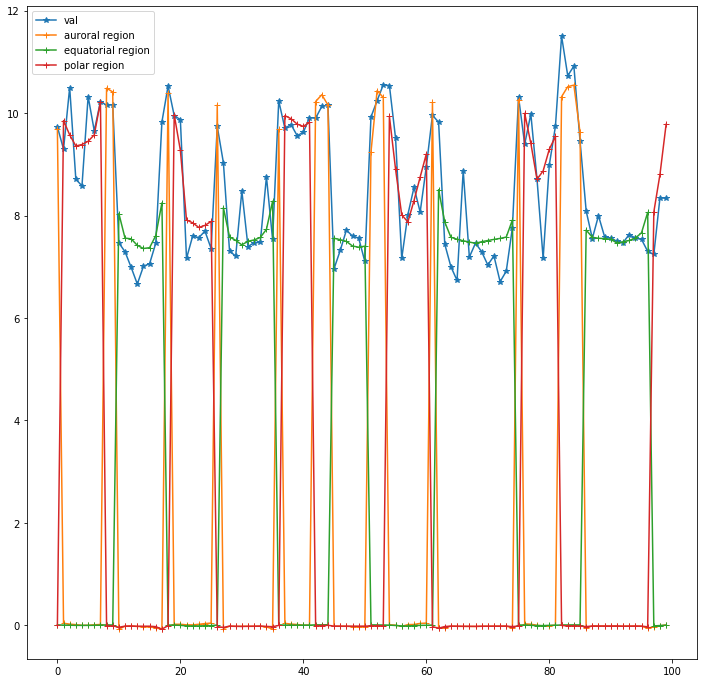

In [50]:
results = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
    


plt.figure(figsize=(12,12))
plt.plot(y[:100],'-*')
plt.plot(results[:100],'o')
plt.legend(['val', 'auroral region','equatorial region','polar region'], loc='upper left')
plt.ylim([6.5,11.5])
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:100],'-*')
plt.plot(results[:100],'-+')
plt.legend(['val', 'auroral region','equatorial region','polar region'], loc='upper left')
plt.show()

In [33]:
mse_final = np.average((results-y)**2)
print(mse_final)

0.5735231559323523


55210
(55210,)


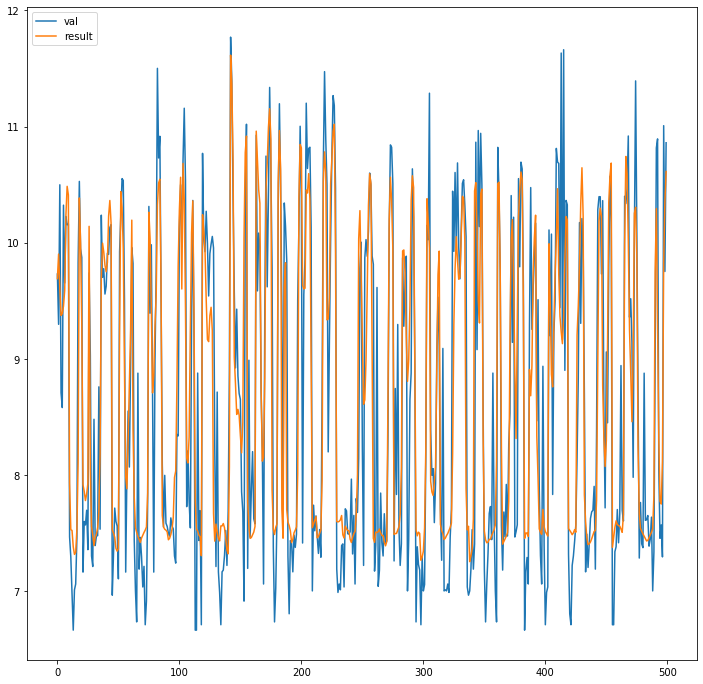

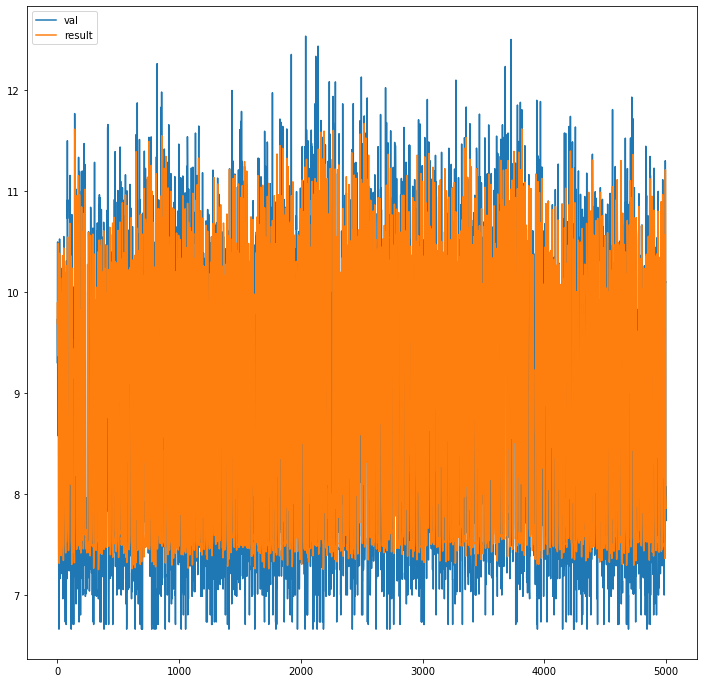

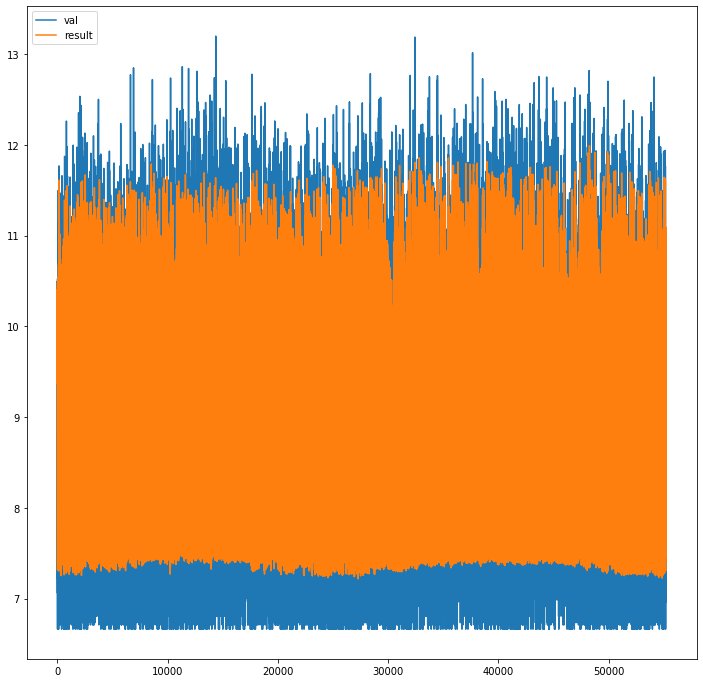

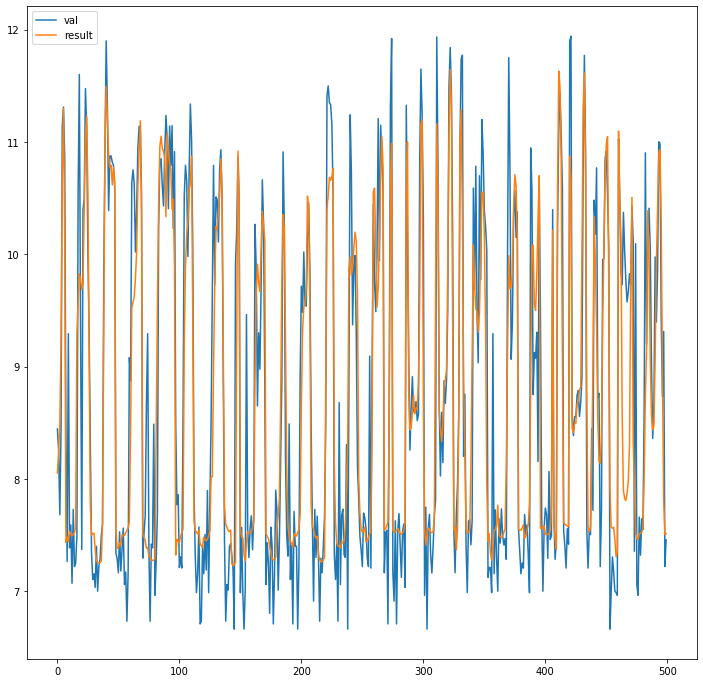

0.5730308685837638


In [34]:


results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.sum(results1[i,:])
    y[i] = np.sum(y_val_log[i,:])
    
plt.figure(figsize=(12,12))
plt.plot(y[:500])
plt.plot(results[:500])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:5000])
plt.plot(results[:5000])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[:])
plt.plot(results[:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

mse_final = np.average((results-y)**2)
print(mse_final)

# Trying Multi-modal without auroral region type as input for X
(but still using the auroal type to specify y_train and y_val for which of the three modes it is in)

In [35]:
feature_cols = [c for c in X_val.columns if not 'aurora_type' in c]
X_val = X_val[feature_cols].copy(deep=True)
X_train = X_train[feature_cols].copy(deep=True)

scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

X = np.array(X_train_scaled, dtype=np.float32)
X_test = np.array(X_val_scaled, dtype=np.float32)


In [36]:
# model = Sequential()

# model.add(Dense(int(256), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(3))


# #compile model using accuracy to measure model performance
# model.compile(loss='mse', optimizer='adam',  metrics=['mse'])

# history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

Epoch 1/1000
705/705 [==============================] - 1s 2ms/step - loss: 11.9728 - mse: 11.9728 - val_loss: 5.6995 - val_mse: 5.6995
Epoch 2/1000
705/705 [==============================] - 1s 2ms/step - loss: 5.6896 - mse: 5.6896 - val_loss: 4.8439 - val_mse: 4.8439
Epoch 3/1000
705/705 [==============================] - 1s 2ms/step - loss: 5.0295 - mse: 5.0295 - val_loss: 4.7102 - val_mse: 4.7102
Epoch 4/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.7346 - mse: 4.7346 - val_loss: 4.5256 - val_mse: 4.5256
Epoch 5/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.5662 - mse: 4.5662 - val_loss: 4.4078 - val_mse: 4.4078
Epoch 6/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.4507 - mse: 4.4507 - val_loss: 4.5560 - val_mse: 4.5560
Epoch 7/1000
705/705 [==============================] - 1s 2ms/step - loss: 4.3588 - mse: 4.3588 - val_loss: 4.5717 - val_mse: 4.5717
Epoch 8/1000
705/705 [==============================] - 1s 2

Epoch 62/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7307 - mse: 3.7307 - val_loss: 4.5769 - val_mse: 4.5769
Epoch 63/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7261 - mse: 3.7261 - val_loss: 4.6405 - val_mse: 4.6405
Epoch 64/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7177 - mse: 3.7177 - val_loss: 4.6876 - val_mse: 4.6876
Epoch 65/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7188 - mse: 3.7188 - val_loss: 4.6166 - val_mse: 4.6166
Epoch 66/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7128 - mse: 3.7128 - val_loss: 4.6733 - val_mse: 4.6733
Epoch 67/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7104 - mse: 3.7104 - val_loss: 4.6089 - val_mse: 4.6089
Epoch 68/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.7008 - mse: 3.7008 - val_loss: 4.5575 - val_mse: 4.5575
Epoch 69/1000
705/705 [==============================] 

705/705 [==============================] - 1s 2ms/step - loss: 3.4981 - mse: 3.4981 - val_loss: 4.6158 - val_mse: 4.6158
Epoch 183/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5063 - mse: 3.5063 - val_loss: 4.6772 - val_mse: 4.6772
Epoch 184/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5088 - mse: 3.5088 - val_loss: 4.7110 - val_mse: 4.7110
Epoch 185/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5046 - mse: 3.5046 - val_loss: 4.8307 - val_mse: 4.8307
Epoch 186/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5025 - mse: 3.5025 - val_loss: 4.7232 - val_mse: 4.7232
Epoch 187/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.5005 - mse: 3.5005 - val_loss: 4.6352 - val_mse: 4.6352
Epoch 188/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4950 - mse: 3.4950 - val_loss: 4.6348 - val_mse: 4.6348
Epoch 189/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 3.4214 - mse: 3.4214 - val_loss: 4.6533 - val_mse: 4.6533
Epoch 303/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4182 - mse: 3.4182 - val_loss: 4.6597 - val_mse: 4.6597
Epoch 304/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4086 - mse: 3.4086 - val_loss: 4.6095 - val_mse: 4.6095
Epoch 305/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4094 - mse: 3.4094 - val_loss: 4.7068 - val_mse: 4.7068
Epoch 306/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4174 - mse: 3.4174 - val_loss: 4.6610 - val_mse: 4.6610
Epoch 307/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4058 - mse: 3.4058 - val_loss: 4.6402 - val_mse: 4.6402
Epoch 308/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.4122 - mse: 3.4122 - val_loss: 4.7064 - val_mse: 4.7064
Epoch 309/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 1s 2ms/step - loss: 3.3636 - mse: 3.3636 - val_loss: 4.6144 - val_mse: 4.6144
Epoch 423/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3533 - mse: 3.3533 - val_loss: 4.6670 - val_mse: 4.6670
Epoch 424/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3685 - mse: 3.3685 - val_loss: 4.6309 - val_mse: 4.6309
Epoch 425/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3597 - mse: 3.3597 - val_loss: 4.6258 - val_mse: 4.6258
Epoch 426/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3563 - mse: 3.3563 - val_loss: 4.6445 - val_mse: 4.6445
Epoch 427/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3554 - mse: 3.3554 - val_loss: 4.6190 - val_mse: 4.6190
Epoch 428/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.3831 - mse: 3.3831 - val_loss: 4.6905 - val_mse: 4.6905
Epoch 429/1000
705/705 [==============================] - 1s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.3147 - mse: 3.3147 - val_loss: 4.5910 - val_mse: 4.5910
Epoch 543/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3305 - mse: 3.3305 - val_loss: 4.7793 - val_mse: 4.7793
Epoch 544/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3190 - mse: 3.3190 - val_loss: 4.6487 - val_mse: 4.6487
Epoch 545/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3173 - mse: 3.3173 - val_loss: 4.5988 - val_mse: 4.5988
Epoch 546/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.3102 - mse: 3.3102 - val_loss: 4.5902 - val_mse: 4.5902
Epoch 547/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.3174 - mse: 3.3174 - val_loss: 4.7290 - val_mse: 4.7290
Epoch 548/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.3155 - mse: 3.3155 - val_loss: 4.7126 - val_mse: 4.7126
Epoch 549/1000
705/705 [==============================] - 2s 3m

705/705 [==============================] - 2s 2ms/step - loss: 3.2894 - mse: 3.2894 - val_loss: 4.6137 - val_mse: 4.6137
Epoch 663/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2805 - mse: 3.2805 - val_loss: 4.6130 - val_mse: 4.6130
Epoch 664/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2841 - mse: 3.2841 - val_loss: 4.6429 - val_mse: 4.6429
Epoch 665/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2863 - mse: 3.2863 - val_loss: 4.6324 - val_mse: 4.6324
Epoch 666/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2843 - mse: 3.2843 - val_loss: 4.6905 - val_mse: 4.6905
Epoch 667/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2892 - mse: 3.2892 - val_loss: 4.6741 - val_mse: 4.6741
Epoch 668/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2994 - mse: 3.2994 - val_loss: 4.6345 - val_mse: 4.6345
Epoch 669/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 3ms/step - loss: 3.2623 - mse: 3.2623 - val_loss: 4.6529 - val_mse: 4.6529
Epoch 783/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2679 - mse: 3.2679 - val_loss: 4.6174 - val_mse: 4.6174
Epoch 784/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2632 - mse: 3.2632 - val_loss: 4.6530 - val_mse: 4.6530
Epoch 785/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2649 - mse: 3.2649 - val_loss: 4.6347 - val_mse: 4.6347
Epoch 786/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2588 - mse: 3.2588 - val_loss: 4.7111 - val_mse: 4.7111
Epoch 787/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2687 - mse: 3.2687 - val_loss: 4.6492 - val_mse: 4.6492
Epoch 788/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2579 - mse: 3.2579 - val_loss: 4.6543 - val_mse: 4.6543
Epoch 789/1000
705/705 [==============================] - 2s 2m

705/705 [==============================] - 2s 2ms/step - loss: 3.2377 - mse: 3.2377 - val_loss: 4.6004 - val_mse: 4.6004
Epoch 903/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2510 - mse: 3.2510 - val_loss: 4.6253 - val_mse: 4.6253
Epoch 904/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2404 - mse: 3.2404 - val_loss: 4.7324 - val_mse: 4.7324
Epoch 905/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2373 - mse: 3.2373 - val_loss: 4.6545 - val_mse: 4.6545
Epoch 906/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2387 - mse: 3.2387 - val_loss: 4.6004 - val_mse: 4.6004
Epoch 907/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2296 - mse: 3.2296 - val_loss: 4.7297 - val_mse: 4.7297
Epoch 908/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2523 - mse: 3.2523 - val_loss: 4.6454 - val_mse: 4.6454
Epoch 909/1000
705/705 [==============================] - 2s 2m

55210
(55210,)


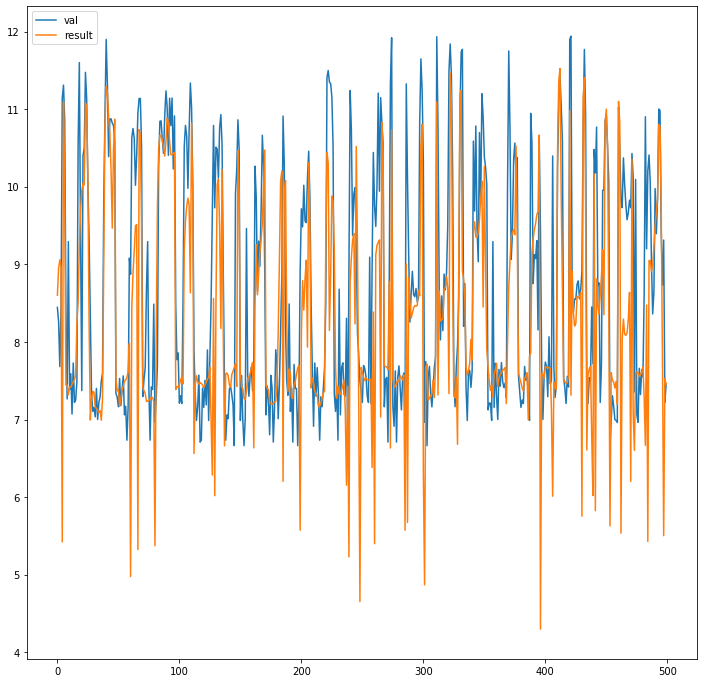

1.9895455851109038


In [37]:
filename = 'best_modal_5'

model.save(filename)
# model.save_weights('my_model_weights2.h5')

model = tensorflow.keras.models.load_model(filename)


results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.max(results1[i,:])
    y[i] = np.max(y_val_log[i,:])

    

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

mse_final = np.average((results-y)**2)
print(mse_final)

55210
(55210,)


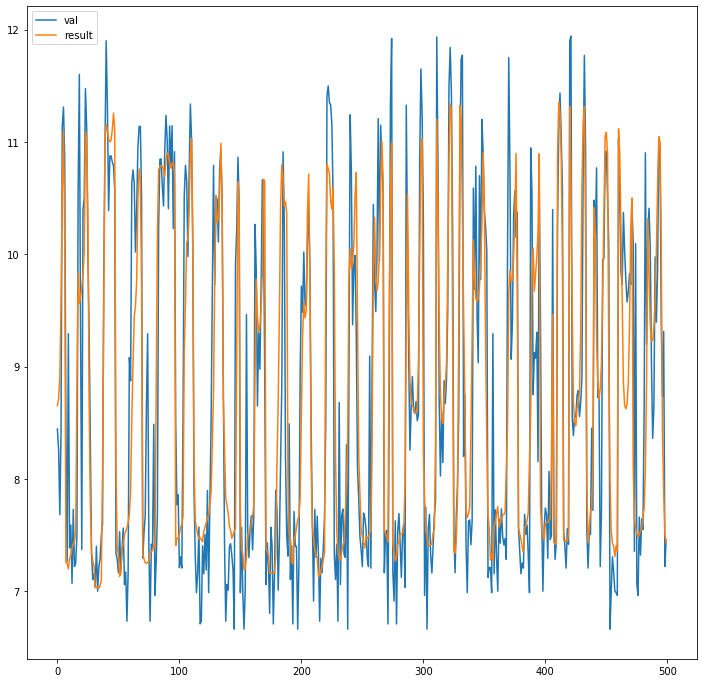

0.6850241138323567


In [38]:

results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.sum(results1[i,:])
    y[i] = np.sum(y_val_log[i,:])

    

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

mse_final = np.average((results-y)**2)
print(mse_final)


In [39]:
# history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

Epoch 1/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2270 - mean_squared_error: 3.2270 - val_loss: 4.6906 - val_mean_squared_error: 4.6906
Epoch 2/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2284 - mean_squared_error: 3.2284 - val_loss: 4.6904 - val_mean_squared_error: 4.6904
Epoch 3/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2275 - mean_squared_error: 3.2275 - val_loss: 4.6428 - val_mean_squared_error: 4.6428
Epoch 4/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2272 - mean_squared_error: 3.2272 - val_loss: 4.6378 - val_mean_squared_error: 4.6378
Epoch 5/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2421 - mean_squared_error: 3.2421 - val_loss: 4.6777 - val_mean_squared_error: 4.6777
Epoch 6/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2286 - mean_squared_error: 3.2286 - val_loss: 4.6512 - val_mean_squared_error: 4.6512
Epoch 7/1000
705

Epoch 100/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2152 - mean_squared_error: 3.2152 - val_loss: 4.6108 - val_mean_squared_error: 4.6108
Epoch 101/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2096 - mean_squared_error: 3.2096 - val_loss: 4.6239 - val_mean_squared_error: 4.6239
Epoch 102/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2136 - mean_squared_error: 3.2136 - val_loss: 4.7939 - val_mean_squared_error: 4.7939
Epoch 103/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2204 - mean_squared_error: 3.2204 - val_loss: 4.6515 - val_mean_squared_error: 4.6515
Epoch 104/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2303 - mean_squared_error: 3.2303 - val_loss: 4.6432 - val_mean_squared_error: 4.6432
Epoch 105/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2178 - mean_squared_error: 3.2178 - val_loss: 4.6675 - val_mean_squared_error: 4.6675
Epoc

705/705 [==============================] - 2s 2ms/step - loss: 3.2029 - mean_squared_error: 3.2029 - val_loss: 4.7622 - val_mean_squared_error: 4.7622
Epoch 199/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2077 - mean_squared_error: 3.2077 - val_loss: 4.6809 - val_mean_squared_error: 4.6809
Epoch 200/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2002 - mean_squared_error: 3.2002 - val_loss: 4.7484 - val_mean_squared_error: 4.7484
Epoch 201/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2356 - mean_squared_error: 3.2356 - val_loss: 4.6858 - val_mean_squared_error: 4.6858
Epoch 202/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2338 - mean_squared_error: 3.2338 - val_loss: 4.7814 - val_mean_squared_error: 4.7814
Epoch 203/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.2032 - mean_squared_error: 3.2032 - val_loss: 4.7017 - val_mean_squared_error: 4.7017
Epoch 204/1000
705/

705/705 [==============================] - 1s 2ms/step - loss: 3.1911 - mean_squared_error: 3.1911 - val_loss: 4.6686 - val_mean_squared_error: 4.6686
Epoch 297/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1978 - mean_squared_error: 3.1978 - val_loss: 4.8285 - val_mean_squared_error: 4.8285
Epoch 298/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1925 - mean_squared_error: 3.1925 - val_loss: 4.6982 - val_mean_squared_error: 4.6982
Epoch 299/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1949 - mean_squared_error: 3.1949 - val_loss: 4.6817 - val_mean_squared_error: 4.6817
Epoch 300/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2365 - mean_squared_error: 3.2365 - val_loss: 4.6678 - val_mean_squared_error: 4.6678
Epoch 301/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.2014 - mean_squared_error: 3.2014 - val_loss: 4.6382 - val_mean_squared_error: 4.6382
Epoch 302/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1804 - mean_squared_error: 3.1804 - val_loss: 4.7616 - val_mean_squared_error: 4.7616
Epoch 395/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1964 - mean_squared_error: 3.1964 - val_loss: 4.6186 - val_mean_squared_error: 4.6186
Epoch 396/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1868 - mean_squared_error: 3.1868 - val_loss: 4.7433 - val_mean_squared_error: 4.7433
Epoch 397/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1981 - mean_squared_error: 3.1981 - val_loss: 4.6457 - val_mean_squared_error: 4.6457
Epoch 398/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1830 - mean_squared_error: 3.1830 - val_loss: 4.7381 - val_mean_squared_error: 4.7381
Epoch 399/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1868 - mean_squared_error: 3.1868 - val_loss: 4.6595 - val_mean_squared_error: 4.6595
Epoch 400/1000
705/

705/705 [==============================] - 2s 3ms/step - loss: 3.1769 - mean_squared_error: 3.1769 - val_loss: 4.6783 - val_mean_squared_error: 4.6783
Epoch 493/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1960 - mean_squared_error: 3.1960 - val_loss: 4.6856 - val_mean_squared_error: 4.6856
Epoch 494/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1946 - mean_squared_error: 3.1946 - val_loss: 4.7529 - val_mean_squared_error: 4.7529
Epoch 495/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1736 - mean_squared_error: 3.1736 - val_loss: 4.5891 - val_mean_squared_error: 4.5891
Epoch 496/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1794 - mean_squared_error: 3.1794 - val_loss: 4.6122 - val_mean_squared_error: 4.6122
Epoch 497/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1679 - mean_squared_error: 3.1679 - val_loss: 4.8115 - val_mean_squared_error: 4.8115
Epoch 498/1000
705/

705/705 [==============================] - 2s 3ms/step - loss: 3.1751 - mean_squared_error: 3.1751 - val_loss: 4.7751 - val_mean_squared_error: 4.7751
Epoch 591/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1680 - mean_squared_error: 3.1680 - val_loss: 4.7083 - val_mean_squared_error: 4.7083
Epoch 592/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1768 - mean_squared_error: 3.1768 - val_loss: 4.7516 - val_mean_squared_error: 4.7516
Epoch 593/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1701 - mean_squared_error: 3.1701 - val_loss: 4.6429 - val_mean_squared_error: 4.6429
Epoch 594/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.2133 - mean_squared_error: 3.2133 - val_loss: 4.7400 - val_mean_squared_error: 4.7400
Epoch 595/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1691 - mean_squared_error: 3.1691 - val_loss: 4.7020 - val_mean_squared_error: 4.7020
Epoch 596/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1646 - mean_squared_error: 3.1646 - val_loss: 4.6504 - val_mean_squared_error: 4.6504
Epoch 689/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1856 - mean_squared_error: 3.1856 - val_loss: 4.7002 - val_mean_squared_error: 4.7002
Epoch 690/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1676 - mean_squared_error: 3.1676 - val_loss: 4.6933 - val_mean_squared_error: 4.6933
Epoch 691/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1701 - mean_squared_error: 3.1701 - val_loss: 4.7224 - val_mean_squared_error: 4.7224
Epoch 692/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1676 - mean_squared_error: 3.1676 - val_loss: 4.8140 - val_mean_squared_error: 4.8140
Epoch 693/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1607 - mean_squared_error: 3.1607 - val_loss: 4.7096 - val_mean_squared_error: 4.7096
Epoch 694/1000
705/

705/705 [==============================] - 1s 2ms/step - loss: 3.1519 - mean_squared_error: 3.1519 - val_loss: 4.7783 - val_mean_squared_error: 4.7783
Epoch 787/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1722 - mean_squared_error: 3.1722 - val_loss: 4.6925 - val_mean_squared_error: 4.6925
Epoch 788/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1806 - mean_squared_error: 3.1806 - val_loss: 4.7156 - val_mean_squared_error: 4.7156
Epoch 789/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1645 - mean_squared_error: 3.1645 - val_loss: 4.7177 - val_mean_squared_error: 4.7177
Epoch 790/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1594 - mean_squared_error: 3.1594 - val_loss: 4.7085 - val_mean_squared_error: 4.7085
Epoch 791/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1651 - mean_squared_error: 3.1651 - val_loss: 4.7726 - val_mean_squared_error: 4.7726
Epoch 792/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1636 - mean_squared_error: 3.1636 - val_loss: 4.6960 - val_mean_squared_error: 4.6960
Epoch 885/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1571 - mean_squared_error: 3.1571 - val_loss: 4.6165 - val_mean_squared_error: 4.6165
Epoch 886/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1511 - mean_squared_error: 3.1511 - val_loss: 4.6031 - val_mean_squared_error: 4.6031
Epoch 887/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1545 - mean_squared_error: 3.1545 - val_loss: 4.7379 - val_mean_squared_error: 4.7379
Epoch 888/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1490 - mean_squared_error: 3.1490 - val_loss: 4.7372 - val_mean_squared_error: 4.7372
Epoch 889/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1553 - mean_squared_error: 3.1553 - val_loss: 4.8119 - val_mean_squared_error: 4.8119
Epoch 890/1000
705/

705/705 [==============================] - 2s 3ms/step - loss: 3.1486 - mean_squared_error: 3.1486 - val_loss: 4.6935 - val_mean_squared_error: 4.6935
Epoch 983/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1424 - mean_squared_error: 3.1424 - val_loss: 4.7118 - val_mean_squared_error: 4.7118
Epoch 984/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1447 - mean_squared_error: 3.1447 - val_loss: 4.7243 - val_mean_squared_error: 4.7243
Epoch 985/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1516 - mean_squared_error: 3.1516 - val_loss: 4.8100 - val_mean_squared_error: 4.8100
Epoch 986/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1524 - mean_squared_error: 3.1524 - val_loss: 4.7801 - val_mean_squared_error: 4.7801
Epoch 987/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1459 - mean_squared_error: 3.1459 - val_loss: 4.7252 - val_mean_squared_error: 4.7252
Epoch 988/1000
705/

55210
(55210,)


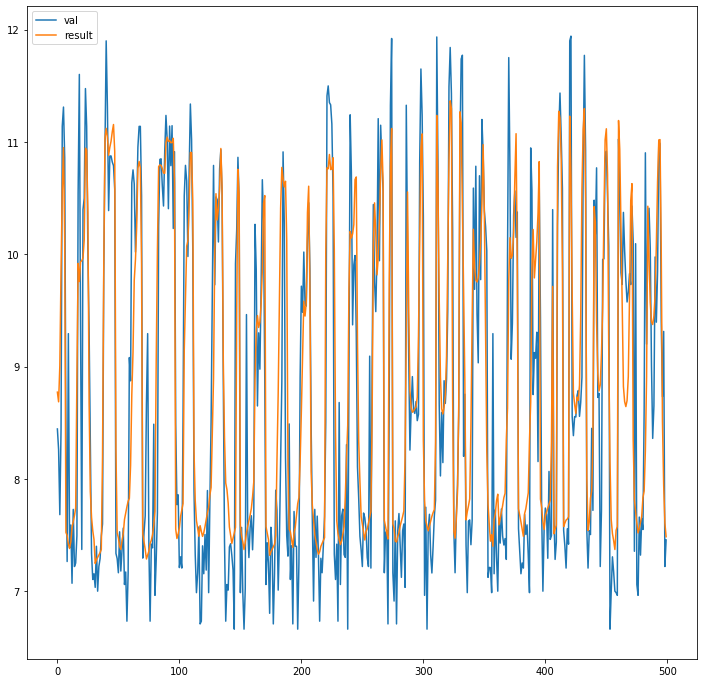

0.6841592343557024


In [40]:

results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.sum(results1[i,:])
    y[i] = np.sum(y_val_log[i,:])

    

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

mse_final = np.average((results-y)**2)
print(mse_final)

In [41]:
history = model.fit(X, np.array(y_train_log), validation_data=(X_test, np.array(y_val_log)), batch_size=1024,epochs=1000)

Epoch 1/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1513 - mean_squared_error: 3.1513 - val_loss: 4.7083 - val_mean_squared_error: 4.7083
Epoch 2/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1770 - mean_squared_error: 3.1770 - val_loss: 4.7875 - val_mean_squared_error: 4.7875
Epoch 3/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1521 - mean_squared_error: 3.1521 - val_loss: 4.6865 - val_mean_squared_error: 4.6865
Epoch 4/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1455 - mean_squared_error: 3.1455 - val_loss: 4.6988 - val_mean_squared_error: 4.6988
Epoch 5/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1387 - mean_squared_error: 3.1387 - val_loss: 4.6836 - val_mean_squared_error: 4.6836
Epoch 6/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1468 - mean_squared_error: 3.1468 - val_loss: 4.7557 - val_mean_squared_error: 4.7557
Epoch 7/1000
705

Epoch 51/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1404 - mean_squared_error: 3.1404 - val_loss: 4.6837 - val_mean_squared_error: 4.6837
Epoch 52/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1465 - mean_squared_error: 3.1465 - val_loss: 4.7646 - val_mean_squared_error: 4.7646
Epoch 53/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1414 - mean_squared_error: 3.1414 - val_loss: 4.6972 - val_mean_squared_error: 4.6972
Epoch 54/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1592 - mean_squared_error: 3.1592 - val_loss: 4.7586 - val_mean_squared_error: 4.7586
Epoch 55/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1445 - mean_squared_error: 3.1445 - val_loss: 4.8033 - val_mean_squared_error: 4.8033
Epoch 56/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1437 - mean_squared_error: 3.1437 - val_loss: 4.8093 - val_mean_squared_error: 4.8093
Epoch 57/1

705/705 [==============================] - 2s 3ms/step - loss: 3.1437 - mean_squared_error: 3.1437 - val_loss: 4.6899 - val_mean_squared_error: 4.6899
Epoch 150/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1703 - mean_squared_error: 3.1703 - val_loss: 4.6490 - val_mean_squared_error: 4.6490
Epoch 151/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1367 - mean_squared_error: 3.1367 - val_loss: 4.6384 - val_mean_squared_error: 4.6384
Epoch 152/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1420 - mean_squared_error: 3.1420 - val_loss: 4.6668 - val_mean_squared_error: 4.6668
Epoch 153/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1325 - mean_squared_error: 3.1325 - val_loss: 4.7224 - val_mean_squared_error: 4.7224
Epoch 154/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1456 - mean_squared_error: 3.1456 - val_loss: 4.7171 - val_mean_squared_error: 4.7171
Epoch 155/1000
705/

705/705 [==============================] - 2s 3ms/step - loss: 3.1368 - mean_squared_error: 3.1368 - val_loss: 4.7913 - val_mean_squared_error: 4.7913
Epoch 248/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1307 - mean_squared_error: 3.1307 - val_loss: 4.6698 - val_mean_squared_error: 4.6698
Epoch 249/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1357 - mean_squared_error: 3.1357 - val_loss: 4.7888 - val_mean_squared_error: 4.7888
Epoch 250/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1341 - mean_squared_error: 3.1341 - val_loss: 4.6464 - val_mean_squared_error: 4.6464
Epoch 251/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1446 - mean_squared_error: 3.1446 - val_loss: 4.7171 - val_mean_squared_error: 4.7171
Epoch 252/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1360 - mean_squared_error: 3.1360 - val_loss: 4.6787 - val_mean_squared_error: 4.6787
Epoch 253/1000
705/

705/705 [==============================] - 1s 2ms/step - loss: 3.1254 - mean_squared_error: 3.1254 - val_loss: 4.6888 - val_mean_squared_error: 4.6888
Epoch 346/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1270 - mean_squared_error: 3.1270 - val_loss: 4.7309 - val_mean_squared_error: 4.7309
Epoch 347/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1271 - mean_squared_error: 3.1271 - val_loss: 4.7372 - val_mean_squared_error: 4.7372
Epoch 348/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1193 - mean_squared_error: 3.1193 - val_loss: 4.7123 - val_mean_squared_error: 4.7123
Epoch 349/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1410 - mean_squared_error: 3.1410 - val_loss: 4.6814 - val_mean_squared_error: 4.6814
Epoch 350/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1214 - mean_squared_error: 3.1214 - val_loss: 4.8169 - val_mean_squared_error: 4.8169
Epoch 351/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1235 - mean_squared_error: 3.1235 - val_loss: 4.6899 - val_mean_squared_error: 4.6899
Epoch 444/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1214 - mean_squared_error: 3.1214 - val_loss: 4.7073 - val_mean_squared_error: 4.7073
Epoch 445/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1247 - mean_squared_error: 3.1247 - val_loss: 4.7377 - val_mean_squared_error: 4.7377
Epoch 446/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1313 - mean_squared_error: 3.1313 - val_loss: 4.7363 - val_mean_squared_error: 4.7363
Epoch 447/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1188 - mean_squared_error: 3.1188 - val_loss: 4.7177 - val_mean_squared_error: 4.7177
Epoch 448/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1184 - mean_squared_error: 3.1184 - val_loss: 4.6510 - val_mean_squared_error: 4.6510
Epoch 449/1000
705/

705/705 [==============================] - 1s 2ms/step - loss: 3.1277 - mean_squared_error: 3.1277 - val_loss: 4.7336 - val_mean_squared_error: 4.7336
Epoch 542/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1151 - mean_squared_error: 3.1151 - val_loss: 4.7698 - val_mean_squared_error: 4.7698
Epoch 543/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1117 - mean_squared_error: 3.1117 - val_loss: 4.7143 - val_mean_squared_error: 4.7143
Epoch 544/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1153 - mean_squared_error: 3.1153 - val_loss: 4.7487 - val_mean_squared_error: 4.7487
Epoch 545/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1243 - mean_squared_error: 3.1243 - val_loss: 4.6733 - val_mean_squared_error: 4.6733
Epoch 546/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1307 - mean_squared_error: 3.1307 - val_loss: 4.7874 - val_mean_squared_error: 4.7874
Epoch 547/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1115 - mean_squared_error: 3.1115 - val_loss: 4.7148 - val_mean_squared_error: 4.7148
Epoch 640/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1194 - mean_squared_error: 3.1194 - val_loss: 4.7587 - val_mean_squared_error: 4.7587
Epoch 641/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1279 - mean_squared_error: 3.1279 - val_loss: 4.7880 - val_mean_squared_error: 4.7880
Epoch 642/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1215 - mean_squared_error: 3.1215 - val_loss: 4.6814 - val_mean_squared_error: 4.6814
Epoch 643/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1229 - mean_squared_error: 3.1229 - val_loss: 4.7098 - val_mean_squared_error: 4.7098
Epoch 644/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1149 - mean_squared_error: 3.1149 - val_loss: 4.6478 - val_mean_squared_error: 4.6478
Epoch 645/1000
705/

705/705 [==============================] - 1s 2ms/step - loss: 3.2663 - mean_squared_error: 3.2663 - val_loss: 4.7025 - val_mean_squared_error: 4.7025
Epoch 738/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1729 - mean_squared_error: 3.1729 - val_loss: 4.8201 - val_mean_squared_error: 4.8201
Epoch 739/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1396 - mean_squared_error: 3.1396 - val_loss: 4.7388 - val_mean_squared_error: 4.7388
Epoch 740/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1440 - mean_squared_error: 3.1440 - val_loss: 4.7590 - val_mean_squared_error: 4.7590
Epoch 741/1000
705/705 [==============================] - 1s 2ms/step - loss: 3.1273 - mean_squared_error: 3.1273 - val_loss: 4.6475 - val_mean_squared_error: 4.6475
Epoch 742/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1340 - mean_squared_error: 3.1340 - val_loss: 4.7399 - val_mean_squared_error: 4.7399
Epoch 743/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1126 - mean_squared_error: 3.1126 - val_loss: 4.7234 - val_mean_squared_error: 4.7234
Epoch 836/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1022 - mean_squared_error: 3.1022 - val_loss: 4.6881 - val_mean_squared_error: 4.6881
Epoch 837/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1085 - mean_squared_error: 3.1085 - val_loss: 4.8201 - val_mean_squared_error: 4.8201
Epoch 838/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1008 - mean_squared_error: 3.1008 - val_loss: 4.7034 - val_mean_squared_error: 4.7034
Epoch 839/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1130 - mean_squared_error: 3.1130 - val_loss: 4.7290 - val_mean_squared_error: 4.7290
Epoch 840/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1056 - mean_squared_error: 3.1056 - val_loss: 4.8251 - val_mean_squared_error: 4.8251
Epoch 841/1000
705/

705/705 [==============================] - 2s 2ms/step - loss: 3.1057 - mean_squared_error: 3.1057 - val_loss: 4.7435 - val_mean_squared_error: 4.7435
Epoch 934/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1048 - mean_squared_error: 3.1048 - val_loss: 4.6958 - val_mean_squared_error: 4.6958
Epoch 935/1000
705/705 [==============================] - 2s 2ms/step - loss: 3.1033 - mean_squared_error: 3.1033 - val_loss: 4.7430 - val_mean_squared_error: 4.7430
Epoch 936/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1029 - mean_squared_error: 3.1029 - val_loss: 4.7064 - val_mean_squared_error: 4.7064
Epoch 937/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1091 - mean_squared_error: 3.1091 - val_loss: 4.7048 - val_mean_squared_error: 4.7048
Epoch 938/1000
705/705 [==============================] - 2s 3ms/step - loss: 3.1275 - mean_squared_error: 3.1275 - val_loss: 4.6945 - val_mean_squared_error: 4.6945
Epoch 939/1000
705/

55210
(55210,)


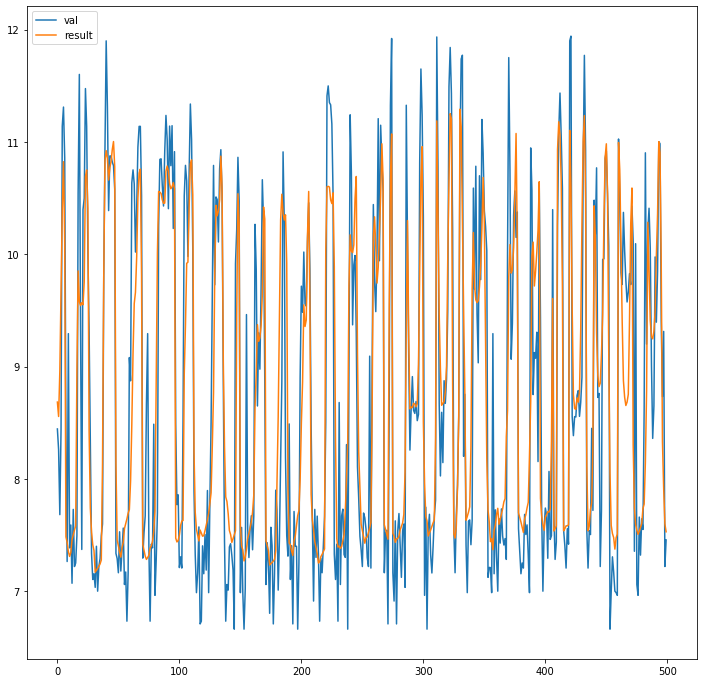

0.6862434272537457


In [42]:

results1 = model.predict(X_val_scaled)#, y_val_log.values)#, batch_size=128)
print(results1.shape[0])
results = np.zeros((results1.shape[0]))
y = np.zeros((results1.shape[0]))
print(y.shape)
for i in range(0,results1.shape[0]):
    results[i]= np.sum(results1[i,:])
    y[i] = np.sum(y_val_log[i,:])

    

plt.figure(figsize=(12,12))
plt.plot(y[-500:])
plt.plot(results[-500:])
plt.legend(['val', 'result'], loc='upper left')
plt.show()

mse_final = np.average((results-y)**2)
print(mse_final)